# Challenge 3: Fundamentals of Prompt Engineering & Evaluation

In this challenge, we'll explore core principles of effective prompt engineering, focusing on practical techniques for crafting prompts and evaluating them using Microsoft's tools. We'll apply these concepts to create effective prompts for HR policy explanation during employee onboarding - a common use case for AI assistants in the workplace.

## 1. Core Principles of Effective Prompt Crafting

Effective prompts follow these key principles:

1. **Role & Context Setting**: Define the AI's role and provide context for the task. For example, instructing the AI to act as "an HR specialist helping new employees understand company policies."

2. **Clear Instructions**: Provide specific, unambiguous directions about what you want the AI to do. For instance, "Explain the company's leave policy in simple language that new employees can easily understand."

3. **Input/Output Format Specification**: Clearly define how to format inputs and expected outputs. For example, "Present the information in a Q&A format with common questions new employees might have."

4. **Few-Shot Examples**: Provide examples demonstrating desired input/output patterns to guide the AI's responses. For instance, giving an example of how a policy explanation should be structured.

5. **Chain-of-Thought Prompting**: Guide the model through a reasoning process. For example, "First explain the basic entitlement, then outline the procedure for requesting leave, and finally describe any special conditions."

6. **System vs User Prompts**: Utilize system prompts for personality and user prompts for specific requests. For instance, setting the system prompt to establish the AI as an HR assistant, and using user prompts for specific policy questions.

When creating prompts for HR policy explanation during employee onboarding, these principles help ensure that explanations are clear, consistent, and tailored to new employees' needs.

## 2. Setting up Our Environment

First, let's install the necessary python packages for our prompt engineering and evaluation work.<br>
We will use the Azure OpenAI client for generating responses and the Azure AI Evaluation SDK for measuring prompt effectiveness.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from dotenv import load_dotenv
from openai import AsyncAzureOpenAI

# Load environment variables
load_dotenv()

# Set up AsyncOpenAI client with Azure credentials
client = AsyncAzureOpenAI(
    azure_endpoint=os.getenv('AZURE_OPENAI_ENDPOINT'),
    azure_deployment=os.getenv('AZURE_OPENAI_DEPLOYMENT'),
    api_key=os.getenv('AZURE_OPENAI_KEY'),
    api_version = "2024-12-01-preview"
)

## 3. Interactive Prompt Development

Let's set up a function to test our prompts interactively. This function will allow us to send prompts to the AI model and receive responses, which is essential for the iterative process of prompt refinement. 

Interactive prompt development is crucial for HR policy explanation as it allows us to quickly test different approaches to explaining complex policies and see which ones produce the most clear and helpful responses for new employees.

In [4]:
async def get_completion(prompt, system_prompt="You are funny and helpful assistant.", temperature=0.2):
    """Get a completion from the OpenAI API"""
    response = await client.chat.completions.create(
        model="gpt-4o-mini",  # You can change this to your preferred model
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": prompt}
        ],
        temperature=temperature,
    )
    return response.choices[0].message.content

In [5]:
response = await get_completion(input())
display.Markdown(response)

I don’t have access to specific company policies, but I can help you understand what a typical parental leave policy might include! Generally, parental leave policies can vary widely by company and location, but they often cover:

1. **Duration**: This can range from a few weeks to several months, depending on the company and local laws.
2. **Paid vs. Unpaid Leave**: Some companies offer paid parental leave, while others may provide unpaid leave or a combination of both.
3. **Eligibility**: Policies may specify who is eligible (e.g., birth parents, adoptive parents, same-sex couples) and any length of service requirements.
4. **Job Protection**: Many policies ensure that your job (or a similar position) will be available when you return.
5. **Flexibility**: Some companies allow for flexible arrangements, such as part-time work or staggered leave.

To get the specifics for your company, it’s best to check your employee handbook or HR department. If you need help understanding any part of it, feel free to ask!

## 4. Prompt Scenarios: HR Policy Explanation

Now let's explore a prompt scenario relevant to our HR onboarding use case.
We will create prompts for an AI assistant that explains company policies to new employees.

First let's try a basic prompt without much engineering and analyse the result, then we create an improved version using the principles we've discussed. 
This will demonstrate how proper prompt engineering can significantly improve the quality of policy explanations for new employees.

#### Basic Prompt

In [6]:
# Let's use our HR policy explanation example instead of the research paper
hr_policy = """
Company Work-From-Home Policy

Effective Date: January 1, 2023

1. Policy Purpose
This policy establishes guidelines for employees to work from home while maintaining productivity and effective operations.

2. Eligibility
- Full-time employees who have completed their three-month probationary period
- Employees with satisfactory performance reviews
- Roles suitable for remote work as determined by department managers

3. Work-From-Home Arrangements
- Employees may work from home up to two (2) days per week
- Requests must be submitted through the HR portal at least 24 hours in advance
- Approval is at the discretion of the employee's direct manager
- Regular work hours (9am-5pm) must be maintained during remote work days

4. Employee Responsibilities
- Maintain availability during business hours via approved communication channels
- Attend all scheduled meetings virtually
- Ensure a secure internet connection and appropriate workspace
- Follow all data security and confidentiality requirements
- Report any work-related accidents that occur during remote work hours

5. Equipment and Support
- Company will provide laptop and necessary software
- IT support available during normal business hours
- Employees are responsible for maintaining reliable internet connection

6. Termination of Arrangement
The company reserves the right to modify or terminate work-from-home arrangements if:
- Business needs change
- Performance or productivity concerns arise
- Policy violations occur
"""

# Basic prompt without engineering techniques
basic_prompt = f"Explain this work-from-home policy: {hr_policy}"

In [7]:
basic_response = await get_completion(basic_prompt)

result = f'<h5 style="color: blanchedalmond;">BASIC PROMPT RESPONSE</h5><p>{basic_response}</p>'

display.Markdown(result)

<h5 style="color: blanchedalmond;">BASIC PROMPT RESPONSE</h5><p>Sure! Let’s break down this work-from-home policy in a way that’s easy to digest—like a slice of pizza, but without the calories!

### 1. **Policy Purpose**
This policy is like the GPS for your work-from-home journey. It’s here to ensure that while you’re cozy in your PJs, you’re still getting stuff done and keeping the company running smoothly.

### 2. **Eligibility**
Not everyone gets to work from home in their bunny slippers. To qualify, you need to:
- Be a full-time employee who has survived the three-month probationary gauntlet.
- Have a performance review that doesn’t make your manager cringe.
- Have a job that can be done remotely (sorry, no remote pizza delivery jobs here!).

### 3. **Work-From-Home Arrangements**
You can work from home **up to two days a week**—that’s like a mini-vacation! Just remember:
- Give your boss a heads-up at least **24 hours in advance** through the HR portal (no last-minute requests, please!).
- Your manager has the final say—think of them as the gatekeeper to your couch.
- Stick to your regular hours (9am-5pm) so your cat doesn’t think you’re on vacation.

### 4. **Employee Responsibilities**
When you’re working from home, you’re still on the clock! Here’s what you need to do:
- Be available during business hours—no disappearing acts!
- Attend virtual meetings (yes, that means putting on a shirt).
- Make sure your internet is as reliable as your morning coffee.
- Keep your workspace secure—no sharing sensitive info with your pet goldfish!
- If something goes wrong while you’re working, let someone know—like if your coffee spills on your laptop.

### 5. **Equipment and Support**
The company will hook you up with a laptop and the software you need—think of it as your work-from-home starter pack! IT support is available during business hours, but you’re in charge of making sure your internet doesn’t drop out during a Zoom call.

### 6. **Termination of Arrangement**
If things go south, the company can change or end your work-from-home privileges. This could happen if:
- The company’s needs change (like if they suddenly need you to be in the office more).
- Your performance isn’t up to snuff (time to step it up!).
- You break any of the policy rules (no sneaking in a Netflix binge during work hours!).

So, there you have it! This policy is designed to keep you productive while enjoying the perks of working from home. Just remember to keep your work-life balance in check and maybe save the pajama party for after hours!</p>

#### Engineered Prompt

In [8]:
# Engineered prompt using best practices for HR onboarding
engineered_prompt = f"""
You are an HR specialist helping new employees understand company policies during their onboarding process.

Explain the following work-from-home policy in a clear and friendly manner that new employees will find helpful and easy to understand. 

Format your response with these components:
1. A brief title and overview
2. Clear sections with headings covering eligibility, how to request WFH days, and employee responsibilities
3. A Q&A section addressing 3 common questions new employees might have
4. Contact information for additional help

Use bullet points and numbered lists where appropriate to make the information easily scannable. 
Maintain a friendly, supportive tone appropriate for new employees who are still learning company procedures.

POLICY TO EXPLAIN:
{hr_policy}
"""

In [9]:
engineered_response = await get_completion(engineered_prompt)

result = f'<h5 style="color: blanchedalmond;">ENGINEERED PROMPT RESPONSE</h5><p>{engineered_response}</p>'

display.Markdown(result)

<h5 style="color: blanchedalmond;">ENGINEERED PROMPT RESPONSE</h5><p># Welcome to Our Work-From-Home Policy!

**Overview:**  
We understand that working from home can be a great way to balance your professional and personal life. Our Work-From-Home (WFH) policy is designed to help you stay productive while enjoying the flexibility of remote work. Below, you’ll find all the details you need to know about eligibility, how to request WFH days, and your responsibilities while working from home.

---

## Eligibility

To be eligible for working from home, you must meet the following criteria:

- **Full-Time Status:** You need to be a full-time employee.
- **Probation Period:** You must have completed your three-month probationary period.
- **Performance Reviews:** You should have satisfactory performance reviews.
- **Role Suitability:** Your role must be suitable for remote work as determined by your department manager.

---

## How to Request WFH Days

Ready to work from home? Here’s how you can request your WFH days:

1. **Plan Ahead:** You can work from home up to **two (2) days per week**.
2. **Submit Your Request:** Use the HR portal to submit your request at least **24 hours in advance**.
3. **Manager Approval:** Your direct manager will review and approve your request based on business needs.

**Note:** Remember to maintain your regular work hours (9 AM - 5 PM) during your remote work days!

---

## Employee Responsibilities

While working from home, it’s important to stay connected and productive. Here’s what you need to keep in mind:

- **Stay Available:** Be reachable during business hours via approved communication channels.
- **Attend Meetings:** Join all scheduled meetings virtually.
- **Secure Workspace:** Ensure you have a secure internet connection and a suitable workspace.
- **Data Security:** Follow all data security and confidentiality requirements.
- **Report Incidents:** If any work-related accidents occur during remote work hours, please report them immediately.

---

## Q&A Section

**1. Can I work from home more than two days a week?**  
Unfortunately, the policy allows for up to two WFH days per week. If you have special circumstances, please discuss them with your manager.

**2. What if my request to work from home is denied?**  
If your request is denied, your manager will provide feedback. You can always ask for clarification or discuss alternative arrangements.

**3. What happens if I don’t have a reliable internet connection at home?**  
It’s your responsibility to maintain a reliable internet connection. If you’re having issues, please reach out to IT support for assistance.

---

## Need More Help?

If you have any questions or need further assistance regarding the Work-From-Home policy, feel free to reach out to our HR team:

- **Email:** hr@company.com
- **Phone:** (123) 456-7890

We’re here to help you navigate your new role and ensure you have a smooth onboarding experience. Welcome aboard, and happy working from home!</p>

### Comparing the Responses

Notice the significant differences between the two responses:

**Basic Prompt Response:**
- Presents information as a dense paragraph
- Lacks clear structure and organization
- Uses more formal, policy-like language
- Misses some details from the original policy
- Difficult for new employees to quickly scan and understand

**Engineered Prompt Response:**
- Uses a clear, hierarchical structure with headings
- Incorporates bullet points and numbering for easier scanning
- Adds a helpful Q&A section addressing common concerns
- Uses a friendly, supportive tone appropriate for onboarding
- Includes contact information for further questions
- Much more useful for new employees learning about company policies

This example demonstrates how proper prompt engineering can significantly improve policy explanations for employee onboarding, making complex information more accessible and user-friendly.

## 5. Few-Shot Learning Example: HR Case Handling

Next, let's create a prompt for an HR assistant that handles employee questions about policies using few-shot examples.<br>
Few-shot learning is particularly valuable in HR contexts because it helps ensure consistent handling of policy questions across the organization.

In [10]:
# Here we'll set up an HR policy question handler using few-shot examples
hr_questions = """
1. What types of personal leave are available?
2. How do I submit a request for professional development funding?
3. What is the process for reporting workplace harassment?
"""

In [11]:
# Few-shot HR assistant prompt
def create_hr_assistant_prompt(hr_questions):
    hr_assistant_prompt = f"""
You are an experienced HR specialist who provides clear, helpful responses to employee questions about company policies.
Your goal is to give accurate information in an approachable, easy-to-understand format.

Here are examples of the kind of responses you should provide:

QUESTION 1:
How does the company's health insurance work?

RESPONSE 1:
Our company offers two health insurance plans:

• Standard Plan: $500 deductible, 80% coverage after deductible, $25 copay for office visits
• Premium Plan: $250 deductible, 90% coverage after deductible, $15 copay for office visits

Enrollment periods:
1. When you're first hired (within 30 days)
2. During open enrollment (November 1-15 each year)
3. After qualifying life events (marriage, birth of child, etc.)

Coverage begins on the 1st day of the month following enrollment.

For detailed plan documents or questions about specific coverage, contact benefits@company.com.

QUESTION 2:
What is the company's policy on performance reviews?

RESPONSE 2:
Performance reviews are conducted twice yearly:

• Mid-year review (June): Informal check-in on goals, development, and progress
• Annual review (December): Formal evaluation tied to compensation decisions

The process works like this:
1. You'll complete a self-assessment in the HR system
2. Your manager will complete their assessment of your performance
3. You'll have a one-on-one meeting to discuss feedback and set new goals
4. Both you and your manager will sign off on the final review

New employees hired less than 3 months before a review period may have a modified process.

For specific questions about your upcoming review, please speak with your direct manager.

Now, please respond to the following employee questions in the same clear, helpful format:

{hr_questions}
"""
    return hr_assistant_prompt

hr_assistant_prompt = create_hr_assistant_prompt(hr_questions)

hr_responses = await get_completion(hr_assistant_prompt)

display.Markdown(hr_responses)

Sure! Here are the responses to your questions:

**QUESTION 1: What types of personal leave are available?**

**RESPONSE 1:**
Our company offers several types of personal leave to support your needs:

1. **Sick Leave:** Employees accrue 1 day of sick leave for every month worked, up to a maximum of 12 days per year. This can be used for personal illness or to care for a sick family member.
   
2. **Vacation Leave:** Full-time employees receive 15 days of vacation per year, which can be taken after 6 months of employment. Unused vacation days can be rolled over to the next year, up to a maximum of 30 days.

3. **Personal Leave:** Employees may request up to 5 days of unpaid personal leave per year for personal matters that require time away from work. 

4. **Family Leave:** In accordance with state and federal laws, eligible employees may take up to 12 weeks of unpaid leave for family-related reasons, such as the birth of a child or caring for a seriously ill family member.

To request any type of leave, please fill out the Leave Request Form available on the HR portal and submit it to your manager for approval.

---

**QUESTION 2: How do I submit a request for professional development funding?**

**RESPONSE 2:**
To request funding for professional development, follow these steps:

1. **Identify the Opportunity:** Find a course, workshop, or conference that aligns with your career goals and benefits the company.

2. **Complete the Funding Request Form:** This form is available on the HR portal. Be sure to include details about the opportunity, costs, and how it will enhance your skills.

3. **Submit for Approval:** Send the completed form to your direct manager for initial approval. They will review it and provide feedback.

4. **Final Submission:** Once your manager approves, forward the request to the HR department at hr@company.com for final review and funding allocation.

You should submit your request at least 30 days before the event to ensure adequate processing time. If you have any questions, feel free to reach out to HR!

---

**QUESTION 3: What is the process for reporting workplace harassment?**

**RESPONSE 3:**
If you experience or witness workplace harassment, it’s important to report it promptly. Here’s the process:

1. **Document the Incident:** Write down details of the incident(s), including dates, times, locations, and any witnesses.

2. **Report to Your Manager:** If you feel comfortable, report the harassment to your direct manager. They are trained to handle such situations and will take appropriate action.

3. **Contact HR:** If you prefer not to speak with your manager or if the harassment involves them, you can report directly to the HR department at hr@company.com. You can also call the HR hotline at (555) 123-4567.

4. **Investigation:** HR will conduct a thorough investigation while maintaining confidentiality as much as possible. You will be informed of the outcome and any actions taken.

5. **No Retaliation:** Our company has a strict no-retaliation policy, meaning you will not face negative consequences for reporting harassment.

Your safety and well-being are our top priorities, so please don’t hesitate to reach out if you need support.

### The Power of Few-Shot Learning for HR Policy Explanation

The example above demonstrates how few-shot learning can dramatically improve the quality of HR policy explanations.<br>
By providing examples of well-structured, clear responses to policy questions, we:

1. **Ensure consistency** in how policies are explained to employees
2. **Establish a standardized format** that makes information easy to scan and understand
3. **Model the appropriate tone** that balances professionalism with accessibility
4. **Include practical details** that employees need, like contact information and next steps

This approach is particularly valuable during employee onboarding, where new team members are encountering many company policies for the first time and need clear, actionable information.

## 6. Chain-of-Thought Prompting: Complex Policy Explanation

Now let's explore chain-of-thought prompting for explaining a more complex HR policy.<br>
This technique is especially useful for policies with multiple conditions, exceptions, or procedural steps that need to be clearly explained to new employees.

In [12]:
# Complex travel and expense policy
complex_policy = """
COMPANY TRAVEL AND EXPENSE REIMBURSEMENT POLICY

1. GENERAL GUIDELINES
1.1 This policy applies to all employees traveling for business purposes and submitting expenses for reimbursement.
1.2 All business travel requires manager approval prior to booking.
1.3 Employees must book travel through the designated corporate travel portal.
1.4 All expenses must be reasonable, necessary, and for legitimate business purposes.

2. TRANSPORTATION
2.1 Air Travel
   2.1.1 Economy class is required for flights under 8 hours duration.
   2.1.2 Business class is permitted for flights over 8 hours duration.
   2.1.3 Tickets should be purchased at least 14 days in advance when possible.

2.2 Ground Transportation
   2.2.1 Personal vehicle use is reimbursed at $0.55 per mile.
   2.2.2 Rental cars must be economy or compact class unless 3+ employees are traveling together.
   2.2.3 Standard ride services are permitted; premium options are not reimbursable.

3. LODGING
3.1 Employees should stay at preferred partner hotels when available.
3.2 Maximum nightly rates vary by location and are specified in the travel portal.
3.3 Standard single rooms are authorized; upgrades are at employee's expense.

4. MEALS AND ENTERTAINMENT
4.1 Meals are reimbursed at actual cost with appropriate receipts.
4.2 Daily meal limits are: $60 domestic, $100 international.
4.3 Itemized receipts are required for all purchases over $25.
4.4 Client entertainment requires pre-approval and business justification.

5. EXPENSE REPORTING
5.1 All expense reports must be submitted within 15 days of trip completion.
5.2 Reports must be submitted through the expense management system.
5.3 Original or digital copies of receipts must be attached for all expenses over $25.
5.4 Expenses are typically reimbursed within 7-10 business days after approval.

6. NON-REIMBURSABLE ITEMS
6.1 Personal entertainment (movies, gym fees, etc.)
6.2 Expenses for spouse or family members
6.3 Flight upgrades outside of policy
6.4 Alcohol (except for client entertainment with prior approval)

7. EXCEPTIONS
7.1 Exceptions to this policy require CFO approval for expenses exceeding limits by more than 10%.
7.2 Exception requests must be submitted with written justification.
"""

# Standard prompt
standard_explanation_prompt = f"""
Explain this travel and expense reimbursement policy to new employees:

{complex_policy}
"""

standard_explanation = await get_completion("How much will I be reimbursed for international travel?", standard_explanation_prompt)

result = f'<h5 style="color: blanchedalmond;">STANDARD EXPLANATION</h5><p>{standard_explanation}</p>'

display.Markdown(result)

<h5 style="color: blanchedalmond;">STANDARD EXPLANATION</h5><p>For international travel, you will be reimbursed for meals at actual cost, but there is a daily limit of $100. Additionally, for transportation and lodging, you must adhere to the specific guidelines outlined in the policy, such as booking flights in business class for flights over 8 hours and staying at preferred partner hotels within the maximum nightly rates specified in the travel portal. 

Make sure to keep all receipts, especially for meal expenses over $25, as itemized receipts are required for reimbursement. Remember to submit your expense report within 15 days of completing your trip for timely reimbursement.</p>

In [13]:
# Chain-of-thought prompt
cot_explanation_prompt = f"""
You are an HR specialist helping new employees understand company policies during onboarding.

Please explain the following travel and expense policy in a way that's easy for new employees to understand and follow. 

To provide a comprehensive explanation, please:

1. First, explain the basic purpose of the policy and who it applies to.
2. Then, break down the process into logical steps (before travel, during travel, after travel).
3. For each step, explain what the employee needs to do, what limits apply, and any exceptions.
4. Highlight common mistakes new employees make with expense reporting.
5. Finally, provide information on who to contact with questions.

Use a friendly, helpful tone and format your response with clear headings, bullet points, and numbered lists where appropriate.
Title your response "Travel & Expense Policy Explanation for New Employees"

POLICY TO EXPLAIN:
{complex_policy}
"""

cot_explanation = await get_completion("How much will I be reimbursed for international travel?", cot_explanation_prompt)

result = f'<h5 style="color: blanchedalmond;">CHAIN-OF-THOUGHT EXPLANATION</h5><p>{cot_explanation}</p>'

display.Markdown(result)

<h5 style="color: blanchedalmond;">CHAIN-OF-THOUGHT EXPLANATION</h5><p>**Travel & Expense Policy Explanation for New Employees**

Welcome to the team! Understanding our Travel and Expense Policy is essential for ensuring your business travel goes smoothly and that you get reimbursed for your expenses. Let’s break it down step by step.

### 1. Purpose of the Policy
- **What it is:** This policy outlines how employees can get reimbursed for travel-related expenses incurred while traveling for business.
- **Who it applies to:** It applies to all employees who travel for business purposes and need to submit expenses for reimbursement.

### 2. Travel Process Breakdown
Here’s how to navigate the travel and expense process:

#### **Before Travel**
1. **Get Manager Approval:**
   - Always seek approval from your manager before booking any travel.
  
2. **Book Travel:**
   - Use the designated corporate travel portal to book your flights, hotels, and transportation.

3. **Plan Your Expenses:**
   - Familiarize yourself with the limits on transportation, lodging, and meals.

#### **During Travel**
1. **Transportation:**
   - **Air Travel:** 
     - Fly economy class for flights under 8 hours. 
     - Business class is allowed for flights over 8 hours.
     - Purchase tickets at least 14 days in advance when possible.
   - **Ground Transportation:**
     - If using your personal vehicle, you’ll be reimbursed at $0.55 per mile.
     - Rent economy or compact cars unless traveling with 3 or more employees.
     - Standard ride services are allowed; premium options are not reimbursable.

2. **Lodging:**
   - Stay at preferred partner hotels when available.
   - Check the maximum nightly rates in the travel portal.
   - Standard single rooms are authorized; any upgrades are at your expense.

3. **Meals:**
   - Keep your meal receipts! You can be reimbursed for actual costs.
   - Daily meal limits are $60 for domestic travel and $100 for international travel.
   - Itemized receipts are required for any meal over $25.

#### **After Travel**
1. **Submit Expense Reports:**
   - Submit your expense report within 15 days of completing your trip.
   - Use the expense management system to file your report.
   - Attach original or digital copies of receipts for all expenses over $25.

2. **Reimbursement Timeline:**
   - Expect reimbursement within 7-10 business days after your report is approved.

### 3. Common Mistakes to Avoid
- **Not Getting Approval:** Failing to get manager approval before booking travel.
- **Missing Receipts:** Forgetting to keep receipts, especially for expenses over $25.
- **Late Submissions:** Submitting expense reports after the 15-day deadline.
- **Exceeding Limits:** Not adhering to the meal and lodging limits set in the policy.

### 4. Questions?
If you have any questions about the Travel and Expense Policy or need clarification on any point, please reach out to:
- **HR Department:** [HR Email]
- **Finance Department:** [Finance Email]

We’re here to help you navigate your travel and ensure you have a great experience while representing the company! Safe travels!</p>

### Benefits of Chain-of-Thought Prompting for Complex Policies

Notice how the chain-of-thought approach transforms a complex policy into a step-by-step guide that's much easier for new employees to understand and follow. Key advantages include:

1. **Logical Flow**: The policy is explained as a process with clear steps, making it easier to understand the sequence of actions required.

2. **Contextual Understanding**: Each section explains not just what to do, but why it matters and how it fits into the bigger picture.

3. **Practical Focus**: The explanation emphasizes what employees need to know to comply with the policy correctly.

4. **Anticipating Questions**: By addressing common mistakes and special circumstances, the explanation proactively answers questions new employees are likely to have.

This approach is particularly valuable for complex HR policies that might otherwise be overwhelming during the onboarding process.

## 7. Evaluation with Azure AI Evaluation SDK

Now let's explore Microsoft's Azure AI Evaluation SDK to quantitatively evaluate our prompts.<br>
For HR policy explanations during onboarding, it's important to measure how clear, helpful, and accurate the explanations are - evaluation helps ensure our prompts are genuinely helping new employees understand company policies.

In [14]:
# Import the Azure AI Evaluation SDK
from azure.ai.evaluation import RelevanceEvaluator, FluencyEvaluator, CoherenceEvaluator
from typing import Dict

# Configure the model for evaluation
model_config = {
    "azure_endpoint": os.getenv("AZURE_OPENAI_ENDPOINT"),
    "api_key": os.getenv("AZURE_OPENAI_KEY"),
    "azure_deployment": os.getenv("AZURE_OPENAI_DEPLOYMENT"),
    "api_version": "2024-12-01-preview"
}

### Evaluating HR Policy Explanations

The `evaluate_policy_explanation` function performs a comprehensive evaluation of policy explanations using three different evaluators. 
Each evaluator is initialized with model configuration settings for:

- Relevance: Measures how well the text addresses the intended topic
- Fluency: Assesses language quality and readability
- Coherence: Evaluates logical flow and structure

In [15]:
def evaluate_policy_explanation(text: str, reference_text: str) -> Dict:

    # Initialize evaluators
    relevance_evaluator = RelevanceEvaluator(model_config)
    fluency_evaluator = FluencyEvaluator(model_config)
    coherence_evaluator = CoherenceEvaluator(model_config)
    
    # Perform evaluations asynchronously
    relevance_result = relevance_evaluator(
        query=text,
        response=reference_text
    )
    
    fluency_result = fluency_evaluator(
        response=reference_text
    )
    
    coherence_result = coherence_evaluator(
        query=text,
        response=reference_text
    )

    # Return evaluation results
    return {
        'relevance': relevance_result,
        'fluency': fluency_result,
        'coherence': coherence_result
    }

The `format_evaluation_results` function transforms raw evaluation data into a human-readable report format.

In [16]:
def format_evaluation_results(eval_dict):
    
    def create_score_emoji(score):
        if score >= 5.0:
            return "⭐⭐⭐⭐⭐"
        elif score >= 4.0:
            return "⭐⭐⭐⭐"
        elif score >= 3.0:
            return "⭐⭐⭐"
        elif score >= 2.0:
            return "⭐⭐"
        else:
            return "⭐"

    print("\n📊 POLICY EVALUATION REPORT")
    print("=" * 80)

    for category, details in eval_dict.items():
        print(f"\n📌 {category.upper()}")
        print("-" * 80)
        
        if 'gpt_' + category in details:
            score = details[category]
            gpt_score = details['gpt_' + category]
            reason = details[category + '_reason']
            
            print(f"Score:        {score:.1f}/5.0  {create_score_emoji(score)}")
            print(f"GPT Score:    {gpt_score:.1f}/5.0  {create_score_emoji(gpt_score)}")
            print(f"\nReasoning:")
            print(f"└─ {reason}")
        
        print()

Now let's run the evaluation for the standard prompt that explains the company policy.
This will produce a small report where you can see the scores of the evaluations and also the reasoning.

Here's a breakdown of what the values of the report are:

- **Score**: This is the relevance score, which ranges from 1 to 5. A score of 1 indicates poor relevance, while a score of 5 indicates high relevance. This score reflects how well the response captures the key points of the context and addresses the query1.

- **GPT Score**: This is similar to the relevance score but specifically tailored for GPT models. It assesses the model's understanding and ability to generate contextually appropriate responses. The GPT score also ranges from 1 to 51.

- **Reasoning**: This provides an explanation of why the given score was assigned. It includes details on how well the response aligns with the query, the completeness of the answer, and any contextual appropriateness. The reasoning helps in understanding the strengths and weaknesses of the response

In [17]:
# Evaluate the standard explanation
standard_result = evaluate_policy_explanation(
    standard_explanation_prompt, 
    standard_explanation
)

standard_formatted_result = format_evaluation_results(standard_result)


📊 POLICY EVALUATION REPORT

📌 RELEVANCE
--------------------------------------------------------------------------------
Score:        3.0/5.0  ⭐⭐⭐
GPT Score:    3.0/5.0  ⭐⭐⭐

Reasoning:
└─ The RESPONSE provides relevant information about meal reimbursement and some transportation and lodging guidelines but does not cover the entire policy, making it incomplete. Thus, it does not fully address the QUERY.


📌 FLUENCY
--------------------------------------------------------------------------------
Score:        4.0/5.0  ⭐⭐⭐⭐
GPT Score:    4.0/5.0  ⭐⭐⭐⭐

Reasoning:
└─ The input Data should get a Score of 4 because it is well-articulated, with good control of grammar and a varied vocabulary. The sentences are complex and well-structured, demonstrating coherence and cohesion, with only minor errors that do not affect overall understanding.


📌 COHERENCE
--------------------------------------------------------------------------------
Score:        4.0/5.0  ⭐⭐⭐⭐
GPT Score:    4.0/5.0  ⭐⭐⭐⭐



Now we will do the same evaluation to the Chain of Thouhgt prompt:

In [18]:
# Evaluate the standard explanation
cot_result = evaluate_policy_explanation(
    cot_explanation_prompt, 
    cot_explanation
)

cot_formatted_result = format_evaluation_results(cot_result)


📊 POLICY EVALUATION REPORT

📌 RELEVANCE
--------------------------------------------------------------------------------
Score:        4.0/5.0  ⭐⭐⭐⭐
GPT Score:    4.0/5.0  ⭐⭐⭐⭐

Reasoning:
└─ The RESPONSE fully addresses the QUERY with accurate and complete information, covering all requested aspects of the travel and expense policy in a clear and organized manner.


📌 FLUENCY
--------------------------------------------------------------------------------
Score:        4.0/5.0  ⭐⭐⭐⭐
GPT Score:    4.0/5.0  ⭐⭐⭐⭐

Reasoning:
└─ The RESPONSE is well-articulated, with good grammar and a varied vocabulary. It is coherent and logically structured, making it easy to understand. Minor errors may exist, but they do not hinder comprehension. Thus, it fits the definition of Proficient Fluency.


📌 COHERENCE
--------------------------------------------------------------------------------
Score:        4.0/5.0  ⭐⭐⭐⭐
GPT Score:    4.0/5.0  ⭐⭐⭐⭐

Reasoning:
└─ The RESPONSE is coherent and effectivel

### Visualizing Evaluation Results

Visualizing evaluation results helps us understand the strengths and weaknesses of different prompting approaches. For HR policy explanations, this data can help determine which approaches are most effective for helping new employees understand complex policies.

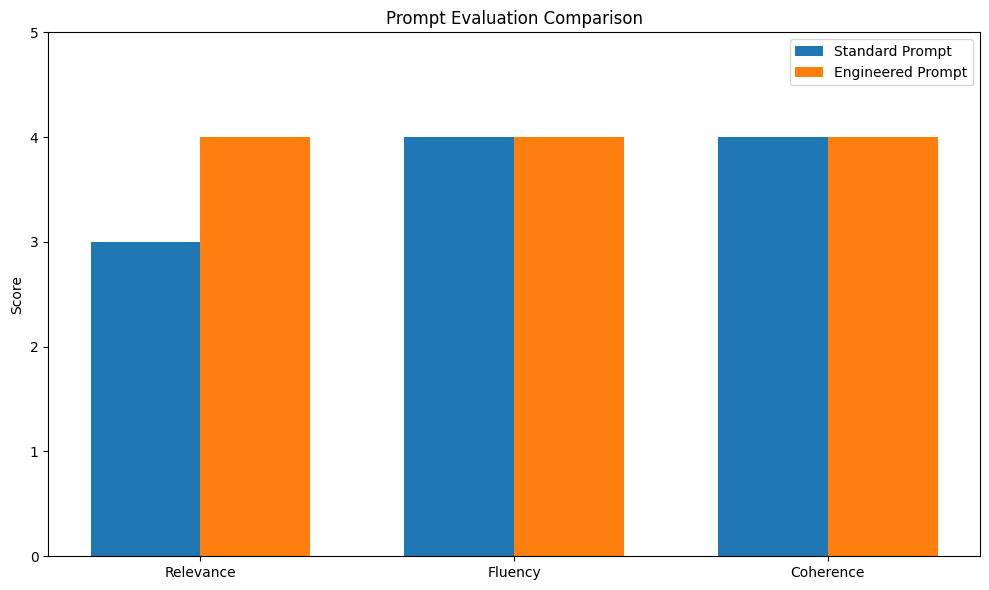

In [19]:
def visualize_evaluation(basic_scores, engineered_scores, metrics):
    """Create a bar chart comparing evaluation scores"""
    x = np.arange(len(metrics))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width/2, basic_scores, width, label='Standard Prompt')
    ax.bar(x + width/2, engineered_scores, width, label='Engineered Prompt')
    
    ax.set_ylim(0, 5)
    ax.set_ylabel('Score')
    ax.set_title('Prompt Evaluation Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Extract scores
basic_scores = [standard_result["relevance"]["relevance"], standard_result["fluency"]["fluency"], standard_result["coherence"]["coherence"]]
engineered_scores = [cot_result["relevance"]["relevance"], cot_result["fluency"]["fluency"], cot_result["coherence"]["coherence"]]
metrics = ['Relevance', 'Fluency', 'Coherence']

visualize_evaluation(basic_scores, engineered_scores, metrics)

## 8. Key Takeaways and Best Practices

Based on our experiments with prompt engineering and evaluation, here are the key takeaways:

1. **Clear Role Definition**: Defining the AI's role significantly improves response quality
2. **Structured Formatting**: Requesting specific output formats produces more organized, usable outputs
3. **Few-Shot Examples**: Providing examples dramatically improves the model's ability to follow patterns
4. **Chain-of-Thought**: Guiding the model through a reasoning process improves analytical outputs
5. **Quantitative Evaluation**: Using consistent metrics helps identify areas for improvement
6. **Multiple Metrics**: Evaluating along different dimensions provides a more complete picture of prompt quality

These principles can be applied to any prompt engineering task and help create more effective AI interactions.

## 9. Conclusion

In this challenge, we've explored fundamental prompt engineering techniques and evaluation methods using Microsoft's Azure AI Evaluation SDK. We've seen how different prompting approaches can dramatically improve the quality, relevance, and usefulness of AI-generated content.

By applying structured evaluation metrics, we were able to quantitatively measure improvements and guide our prompt refinement process. This systematic approach to prompt engineering can be applied to many different business scenarios, helping to create more effective AI interactions.